## Importing the libraries needed:

In [1]:
# Import necessary libraries
# Import libraries for data manipulation and analysis
import pandas as pd  # For working with tabular data
import numpy as np  # For numerical operations

# Import libraries for visualization
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For enhanced visualization

# Import tools for data preprocessing and modeling
from sklearn.model_selection import train_test_split  # For splitting data into train/test/validation
from sklearn.preprocessing import StandardScaler  # For feature scaling

# Import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Import ML models
from sklearn.tree import DecisionTreeClassifier, plot_tree   # Decision tree and visualization
from sklearn.neighbors import KNeighborsClassifier  # k-Nearest Neighbors
from sklearn.svm import SVC  # Support Vector Machine


## Load and Display the Dataset:

In [2]:
# Load dataset 
df = pd.read_csv("student-mat.csv", sep=";")

# Create a new binary target column based on G3: "Pass" if G3 >= 10, otherwise "Fail"
df["Result"] = df["G3"].apply(lambda x: "Pass" if x >= 10 else "Fail")

# Display the first 10 rows for inspection
print("First 10 rows of the dataset:")
print(df.head(10))

# Print structure of dataset including types and non-null values
print("\nDataset Info:")
print(df.info())

First 10 rows of the dataset:
  school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   
6     GP   M   16       U     LE3       T     2     2     other     other   
7     GP   F   17       U     GT3       A     4     4     other   teacher   
8     GP   M   15       U     LE3       A     3     2  services     other   
9     GP   M   15       U     GT3       T     3     4     other     other   

   ... freetime goout  Dalc  Walc  health absences  G1  G2  G3 Result  
0  ...        3     4     1     1       3        6

## Encode and Split Data:

In [3]:
# One-hot encode all categorical columns (convert to binary)
df_encoded = pd.get_dummies(df.drop(columns=["G3"]), drop_first=True)

# Define features and target
X = df_encoded.drop("Result_Pass", axis=1)
y = df_encoded["Result_Pass"]  # Target (y): 1 = Pass, 0 = Fail

# Split into train (60%), validation (20%), and test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


##   Scale Data for KNN and SVM:

In [4]:
# Scale features for distance-based models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and scale training data
X_val_scaled = scaler.transform(X_val)   # Scale validation data
X_test_scaled = scaler.transform(X_test)  # Scale test data


## Decision Tree (Unpruned & Pruned):

In [5]:
# Unpruned Decision Tree
dt_model = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_model.fit(X_train, y_train)

# Predict labels on train, val, and test sets
y_train_pred_dt = dt_model.predict(X_train)
y_val_pred_dt = dt_model.predict(X_val)
y_test_pred_dt = dt_model.predict(X_test)

# Calculate  accuracies
dt_train_acc = accuracy_score(y_train, y_train_pred_dt) * 100
dt_val_acc = accuracy_score(y_val, y_val_pred_dt) * 100
dt_test_acc = accuracy_score(y_test, y_test_pred_dt) * 100

# Pruned Decision Tree
# Initialize pruned Decision Tree with depth and minimum sample split limits
dt_pruned = DecisionTreeClassifier(criterion="entropy", max_depth=4, min_samples_split=10, random_state=42)
dt_pruned.fit(X_train, y_train)  # Train the pruned model

# Predict on all sets
y_train_pred_pruned = dt_pruned.predict(X_train)
y_val_pred_pruned = dt_pruned.predict(X_val)
y_test_pred_pruned = dt_pruned.predict(X_test)


# Calculate accuracies
dt_pruned_train_acc = accuracy_score(y_train, y_train_pred_pruned) * 100
dt_pruned_val_acc = accuracy_score(y_val, y_val_pred_pruned) * 100
dt_pruned_test_acc = accuracy_score(y_test, y_test_pred_pruned) * 100


##  Finding best k value:

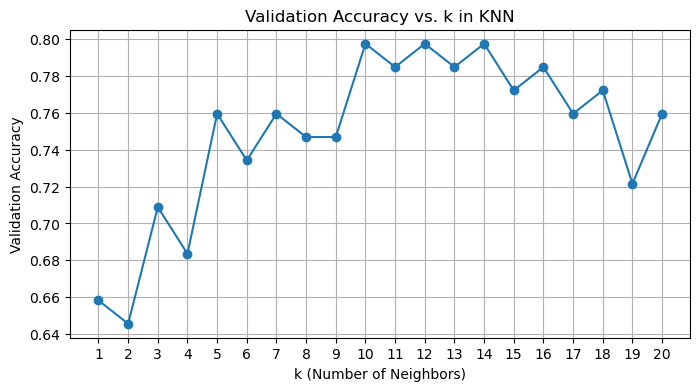


Best k value based on validation set: 10


In [6]:
# Find best k value using validation accuracy
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 21)  # Try k from 1 to 20
val_scores = []  # Store validation accuracy for each k

for k in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    val_acc = accuracy_score(y_val, knn_model.predict(X_val_scaled))
    val_scores.append(val_acc)

# Plot validation accuracy for different k
plt.figure(figsize=(8, 4))
plt.plot(k_range, val_scores, marker='o')
plt.title("Validation Accuracy vs. k in KNN")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Validation Accuracy")
plt.xticks(k_range)
plt.grid()
plt.show()

# Select best k based on highest validation accuracy
best_k = k_range[np.argmax(val_scores)]
print(f"\nBest k value based on validation set: {best_k}")


##  KNN Model:

In [7]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=best_k)  # Using the best value for k which is:10
knn_model.fit(X_train_scaled, y_train)  # Train KNN using scaled training data

# Predict on train, validation, and test sets
y_train_pred_knn = knn_model.predict(X_train_scaled)
y_val_pred_knn = knn_model.predict(X_val_scaled)
y_test_pred_knn = knn_model.predict(X_test_scaled)

# Compute accuracies
knn_train_acc = accuracy_score(y_train, y_train_pred_knn) * 100
knn_val_acc = accuracy_score(y_val, y_val_pred_knn) * 100
knn_test_acc = accuracy_score(y_test, y_test_pred_knn) * 100


##  SVM Model:

In [8]:
# Support Vector Machine
svm_model = SVC(kernel="rbf", random_state=42)  # Initialize SVM with RBF kernel
svm_model.fit(X_train_scaled, y_train)   # Train SVM on scaled training data

# Predict on train, validation, and test sets
y_train_pred_svm = svm_model.predict(X_train_scaled)
y_val_pred_svm = svm_model.predict(X_val_scaled)
y_test_pred_svm = svm_model.predict(X_test_scaled)

# Compute accuracies
svm_train_acc = accuracy_score(y_train, y_train_pred_svm) * 100
svm_val_acc = accuracy_score(y_val, y_val_pred_svm) * 100
svm_test_acc = accuracy_score(y_test, y_test_pred_svm) * 100

##  Evaluation Decision Tree (Unpruned):

Decision Tree (Unpruned)
Training Accuracy: 100.00%
Validation Accuracy: 92.41%
Test Accuracy: 82.28%
              precision    recall  f1-score   support

        Fail       0.76      0.81      0.79        32
        Pass       0.87      0.83      0.85        47

    accuracy                           0.82        79
   macro avg       0.82      0.82      0.82        79
weighted avg       0.83      0.82      0.82        79



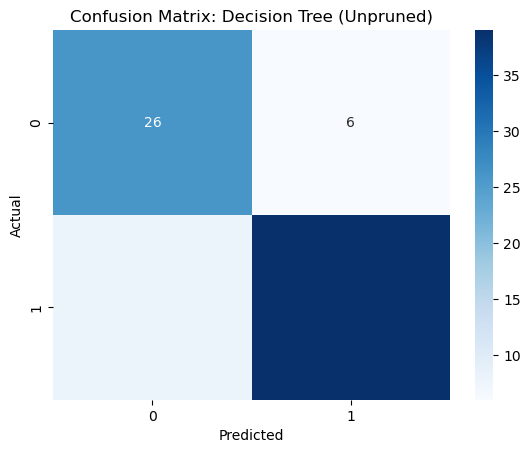

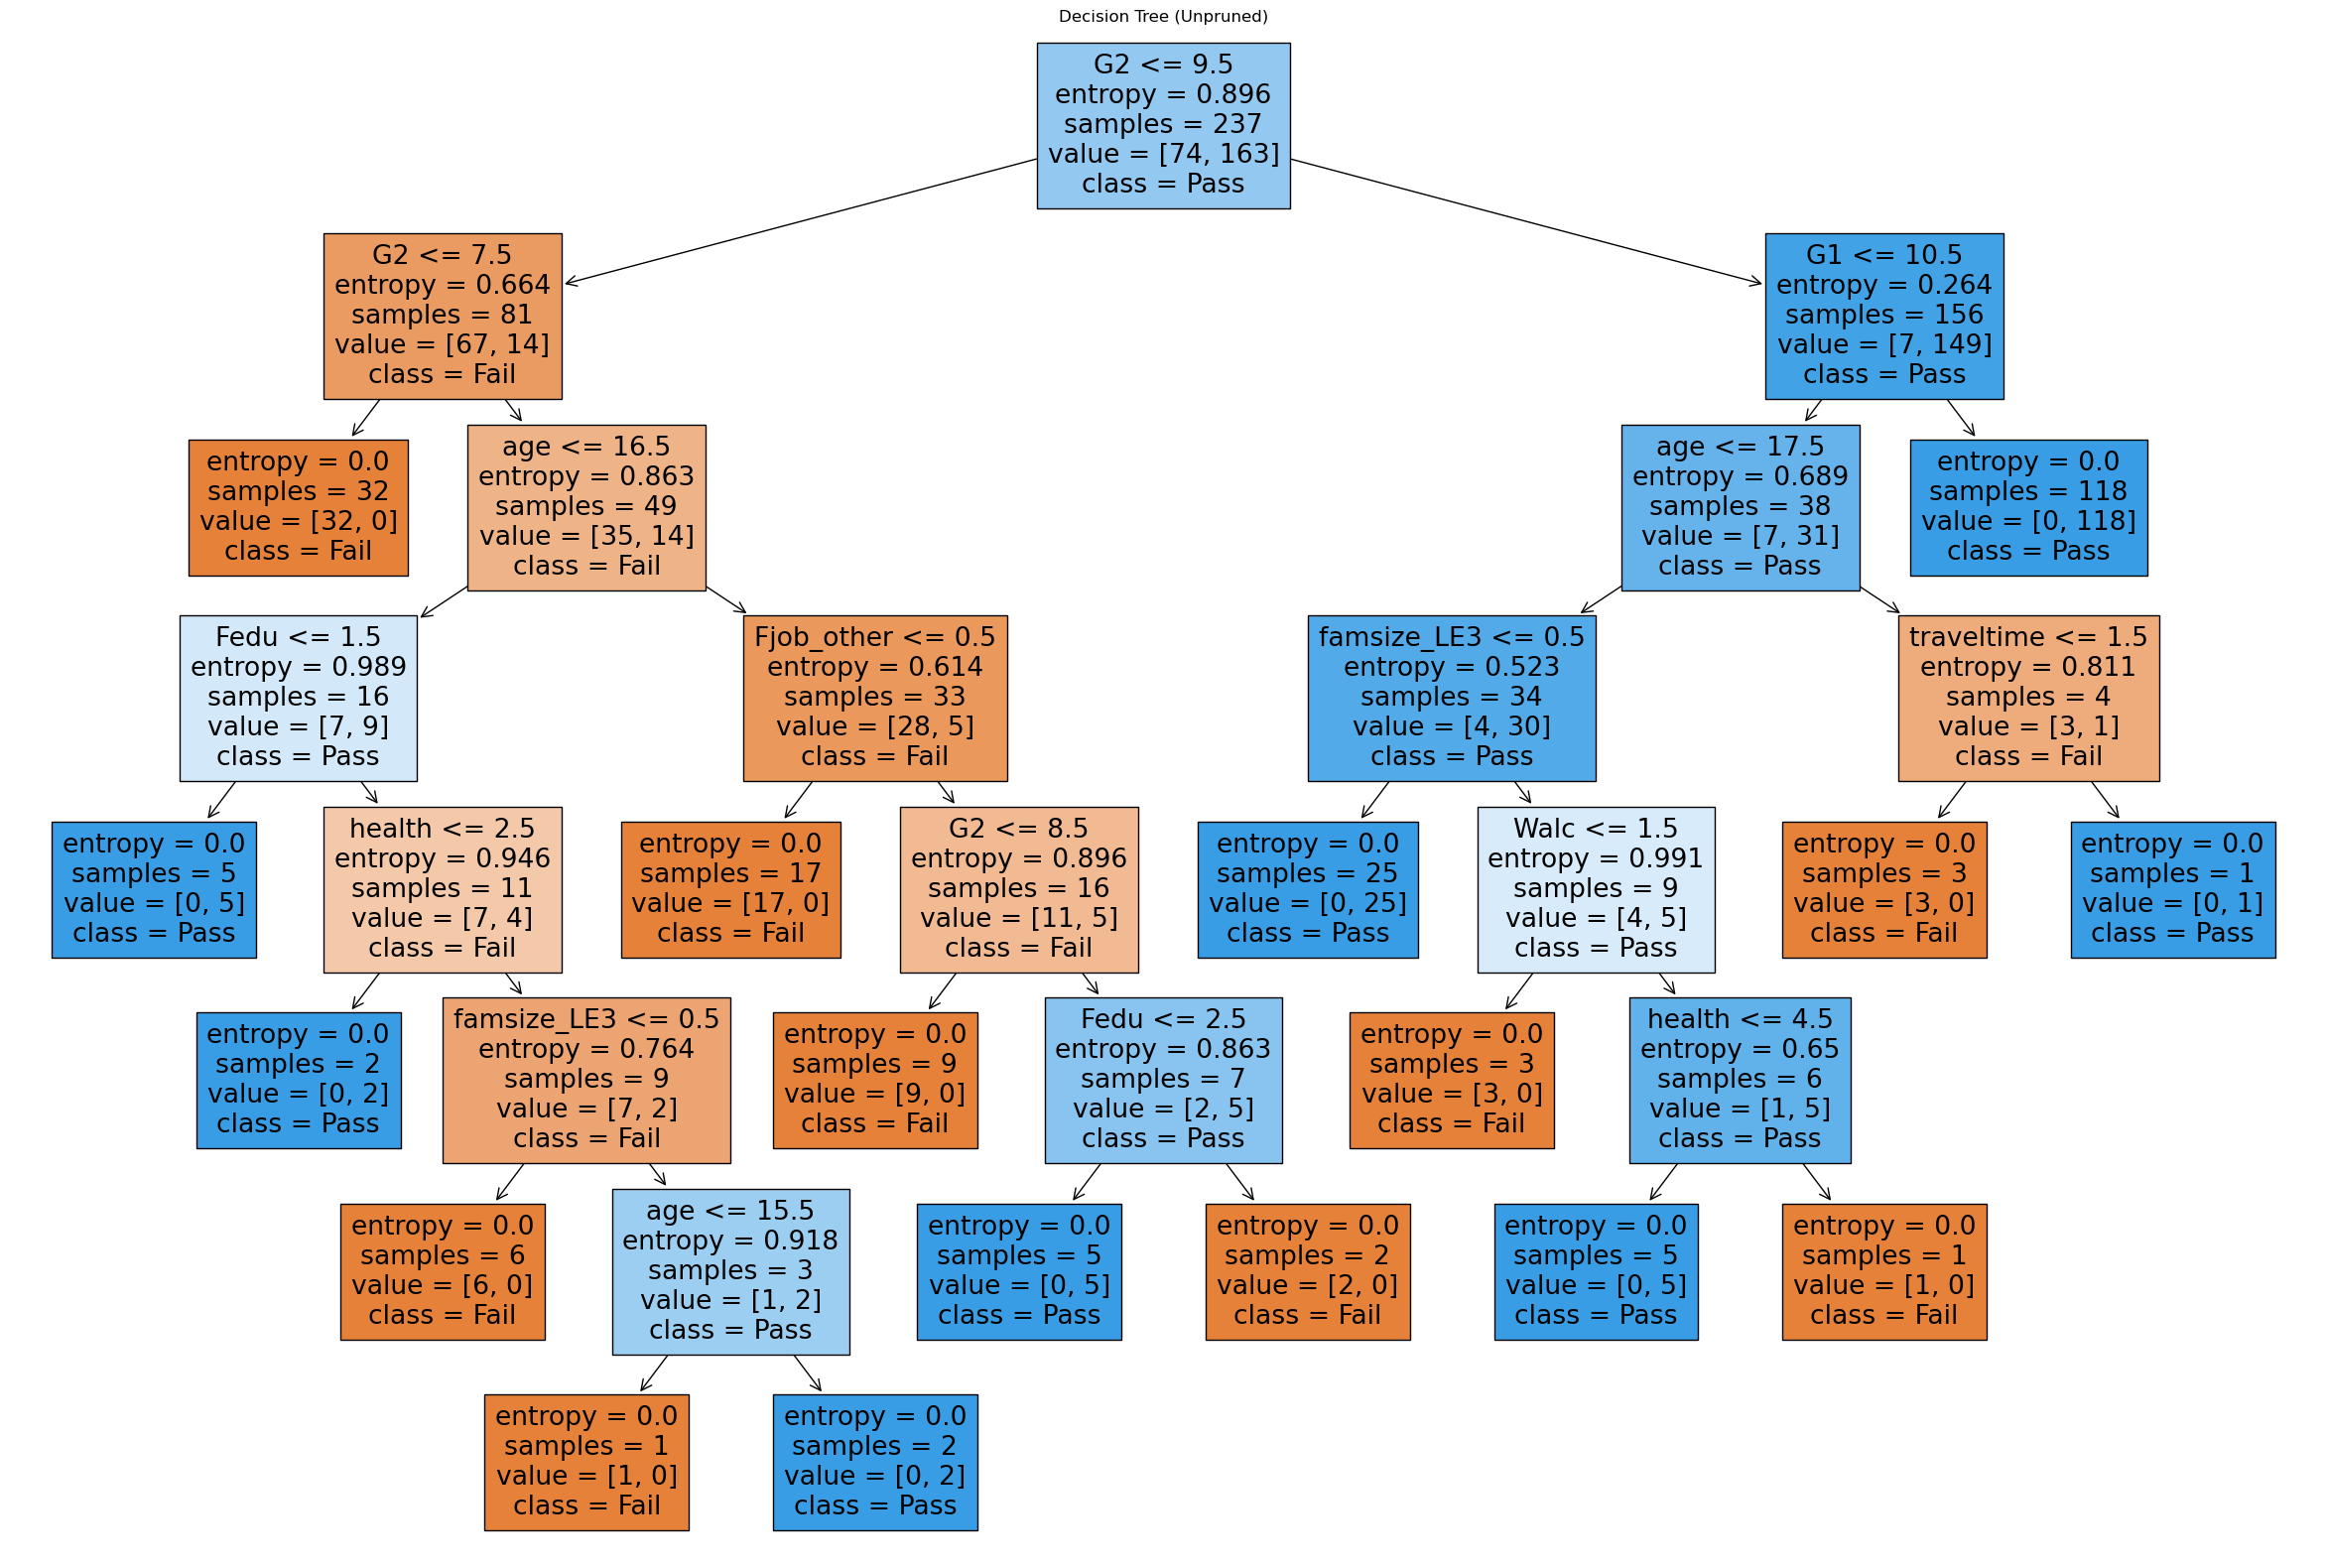

In [9]:
print("Decision Tree (Unpruned)")
print(f"Training Accuracy: {dt_train_acc:.2f}%")
print(f"Validation Accuracy: {dt_val_acc:.2f}%")
print(f"Test Accuracy: {dt_test_acc:.2f}%")
print(classification_report(y_test,y_test_pred_dt , target_names=["Fail", "Pass"]))

# confusion matrix
sns.heatmap(confusion_matrix(y_test,y_test_pred_dt ), annot=True, cmap="Blues", fmt="d") 
plt.title("Confusion Matrix: Decision Tree (Unpruned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot the unpruned tree
plt.figure(figsize=(30, 20))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=["Fail", "Pass"])
plt.title("Decision Tree (Unpruned)")
plt.show()


##  Evaluation Decision Tree (Pruned):

 Decision Tree (Pruned)
Training Accuracy: 94.09%
Validation Accuracy: 91.14%
Test Accuracy: 91.14%
              precision    recall  f1-score   support

        Fail       0.84      0.97      0.90        32
        Pass       0.98      0.87      0.92        47

    accuracy                           0.91        79
   macro avg       0.91      0.92      0.91        79
weighted avg       0.92      0.91      0.91        79



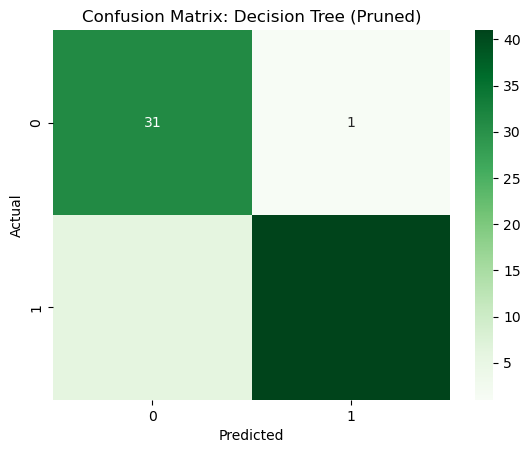

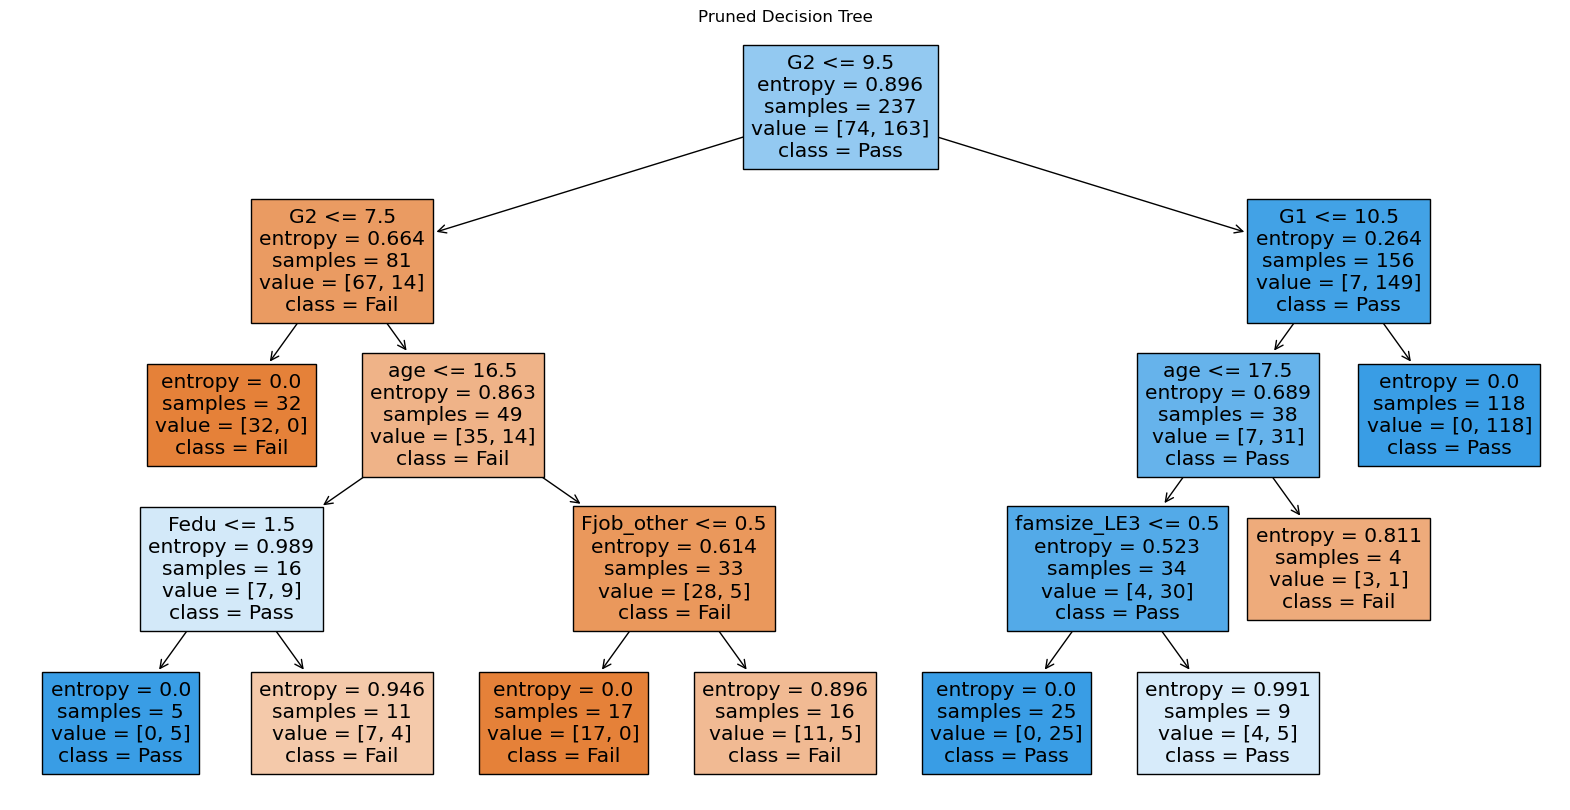

In [10]:
print(" Decision Tree (Pruned)")
print(f"Training Accuracy: {dt_pruned_train_acc:.2f}%")
print(f"Validation Accuracy: {dt_pruned_val_acc:.2f}%")
print(f"Test Accuracy: {dt_pruned_test_acc:.2f}%")
print(classification_report(y_test, y_test_pred_pruned, target_names=["Fail", "Pass"]))

# confusion matrix
sns.heatmap(confusion_matrix(y_test, y_test_pred_pruned), annot=True, cmap="Greens", fmt="d")
plt.title("Confusion Matrix: Decision Tree (Pruned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot the pruned tree
plt.figure(figsize=(20, 10))
plot_tree(dt_pruned, filled=True, feature_names=X.columns, class_names=["Fail", "Pass"])
plt.title("Pruned Decision Tree")
plt.show()


##  Evaluation KNN:

 k-Nearest Neighbors (KNN)
Training Accuracy:   85.23%
Validation Accuracy: 79.75%
Test Accuracy: 72.15%
              precision    recall  f1-score   support

        Fail       0.81      0.41      0.54        32
        Pass       0.70      0.94      0.80        47

    accuracy                           0.72        79
   macro avg       0.76      0.67      0.67        79
weighted avg       0.74      0.72      0.70        79



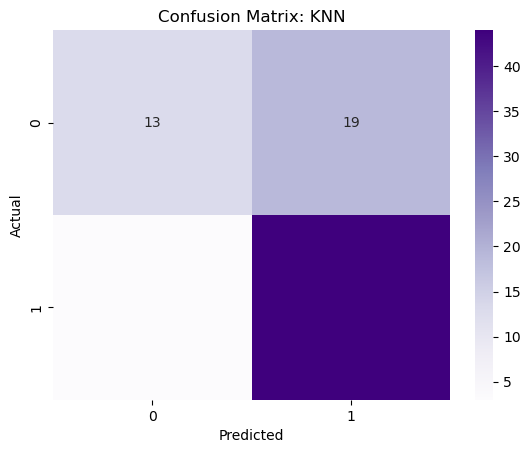

In [11]:
print(" k-Nearest Neighbors (KNN)")
print(f"Training Accuracy:   {knn_train_acc:.2f}%")
print(f"Validation Accuracy: {knn_val_acc:.2f}%")
print(f"Test Accuracy: {knn_test_acc:.2f}%")
print(classification_report(y_test, y_test_pred_knn, target_names=["Fail", "Pass"]))

# confusion matrix
sns.heatmap(confusion_matrix(y_test, y_test_pred_knn), annot=True, cmap="Purples", fmt="d")
plt.title("Confusion Matrix: KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Evaluation SVM: 

 Support Vector Machine (SVM) 
Training Accuracy:   98.31%
Validation Accuracy: 87.34%
Test Accuracy: 79.75%
              precision    recall  f1-score   support

        Fail       0.86      0.59      0.70        32
        Pass       0.77      0.94      0.85        47

    accuracy                           0.80        79
   macro avg       0.82      0.76      0.77        79
weighted avg       0.81      0.80      0.79        79



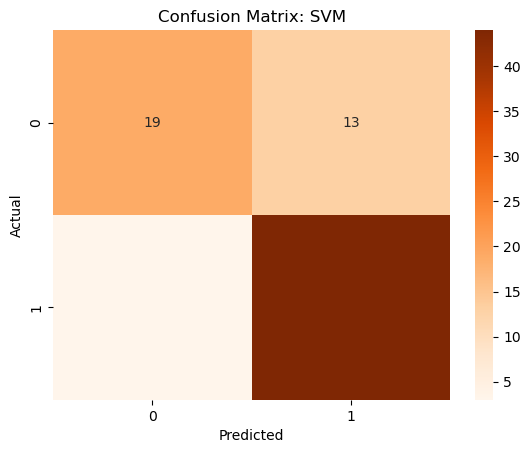

In [12]:
print(" Support Vector Machine (SVM) ")
print(f"Training Accuracy:   {svm_train_acc:.2f}%")
print(f"Validation Accuracy: {svm_val_acc:.2f}%")
print(f"Test Accuracy: {svm_test_acc:.2f}%")
print(classification_report(y_test,y_test_pred_svm , target_names=["Fail", "Pass"]))

# confusion matrix
sns.heatmap(confusion_matrix(y_test, y_test_pred_svm), annot=True, cmap="Oranges", fmt="d")
plt.title("Confusion Matrix: SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



## Test Accuracy for all algorithms: 

In [13]:
# Print test accuracy summary of all models (for comparison)
print("Final Test Accuracy Summary:")
print(f"Decision Tree (Unpruned): {dt_test_acc:.2f}%")
print(f"Decision Tree (Pruned): {dt_pruned_test_acc:.2f}%")
print(f"KNN: {knn_test_acc:.2f}%")
print(f"SVM: {svm_test_acc:.2f}%")

Final Test Accuracy Summary:
Decision Tree (Unpruned): 82.28%
Decision Tree (Pruned): 91.14%
KNN: 72.15%
SVM: 79.75%
